# Section 3 - Supervised Learning

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore") # to ignore long warning messages

import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor

from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from scipy.stats import pearsonr

from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

from sklearn.model_selection import RandomizedSearchCV

import joblib

import matplotlib.pyplot as plt

## Load the data

In [2]:
# load with pandas
train_dataset = pd.read_csv('data/ML_train_dataset.csv')
# print the shape of the data (number of rows and columns)
print(train_dataset.shape)
# print the first 5 rows of the data
train_dataset.head()

(18442, 10334)


,Genomic_0,Genomic_1,Genomic_2,Genomic_3,Genomic_4,Genomic_5,Genomic_6,Genomic_7,Genomic_8,Genomic_9,...,Morgan_1004_drug2,Morgan_1005_drug2,Morgan_1009_drug2,Morgan_1010_drug2,Morgan_1011_drug2,Morgan_1014_drug2,Morgan_1017_drug2,Morgan_1018_drug2,Morgan_1019_drug2,Y
0,5.269788,5.034453,5.269788,0.90597,2.510154,5.269788,5.269788,-1.493994,1.140595,-0.89096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.693530
1,5.269788,5.034453,5.269788,0.90597,2.510154,5.269788,5.269788,-1.493994,1.140595,-0.89096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.778053
2,5.269788,5.034453,5.269788,0.90597,2.510154,5.269788,5.269788,-1.493994,1.140595,-0.89096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.198505
3,5.269788,5.034453,5.269788,0.90597,2.510154,5.269788,5.269788,-1.493994,1.140595,-0.89096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.139971
4,5.269788,5.034453,5.269788,0.90597,2.510154,5.269788,5.269788,-1.493994,1.140595,-0.89096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.175936


In [3]:
# load the test data
test_dataset = pd.read_csv('data/ML_test_dataset.csv')
print(test_dataset.shape)
test_dataset.head()

(4610, 10334)


,Genomic_0,Genomic_1,Genomic_2,Genomic_3,Genomic_4,Genomic_5,Genomic_6,Genomic_7,Genomic_8,Genomic_9,...,Morgan_1004_drug2,Morgan_1005_drug2,Morgan_1009_drug2,Morgan_1010_drug2,Morgan_1011_drug2,Morgan_1014_drug2,Morgan_1017_drug2,Morgan_1018_drug2,Morgan_1019_drug2,Y
0,-0.189761,-0.198631,-0.189761,-0.960891,-0.398382,-0.189761,-0.189761,-1.395685,-0.674233,-0.890960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-66.134218
1,-0.189761,-0.198631,-0.189761,1.492552,-0.398382,-0.189761,-0.189761,-0.928305,-0.674233,-0.890960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-3.809199
2,-0.189761,-0.198631,-0.189761,0.905970,-0.398382,-0.189761,-0.189761,0.784357,-0.674233,1.650004,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.652960
3,-0.189761,-0.198631,-0.189761,0.905970,-0.398382,-0.189761,-0.189761,-1.021070,-0.674233,0.572001,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-16.204517
4,-0.189761,-0.198631,-0.189761,0.905970,-0.398382,-0.189761,-0.189761,-1.021070,-0.674233,0.572001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-17.080158


In [4]:
X_train = train_dataset.drop('Y', axis=1)
y_train = train_dataset['Y']
X_test = test_dataset.drop('Y', axis=1)
y_test = test_dataset['Y']

## Train and test ridge regression model

In [5]:
# ridge regression
ridge = Ridge(random_state=42, max_iter=1000)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
print('MSE on test set:', mean_squared_error(y_test, y_pred))
print('RMSE on test set:', root_mean_squared_error(y_test, y_pred))
print("r2 on test set:", r2_score(y_test, y_pred))
print('Pearson_r on test set:', pearsonr(y_test, y_pred))

MSE on test set: 404.7647012143111
RMSE on test set: 20.118764902804326
r2 on test set: 0.22441945546942343
Pearson_r on test set: PearsonRResult(statistic=np.float64(0.4738551303037435), pvalue=np.float64(8.724626971601407e-257))


## Feature selection from model

In [6]:
# feature selection from model

# feature selection from ridge using SelectFromModel
selector = SelectFromModel(estimator=ridge)
selector.fit(X_train, y_train)

# get the boolean mask of selected features
selected_features_mask = selector.get_support()

# get the column names of selected features
selected_columns = X_train.columns[selected_features_mask]

# transform the data
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

print(X_train.shape)
print(X_test.shape)
print(selected_columns)


(18442, 2205)
(4610, 2205)
Index(['Genomic_12', 'Genomic_24', 'Genomic_39', 'Genomic_119', 'Genomic_145',
       'Genomic_162', 'Genomic_163', 'Genomic_164', 'Genomic_165',
       'Genomic_166',
       ...
       'PEOE_VSA9_drug2', 'SMR_VSA10_drug2', 'SlogP_VSA1_drug2',
       'SlogP_VSA4_drug2', 'SlogP_VSA8_drug2', 'EState_VSA5_drug2',
       'EState_VSA7_drug2', 'MolLogP_drug2', 'fr_HOCCN_drug2',
       'fr_para_hydroxylation_drug2'],
      dtype='object', length=2205)


## Train and test multiple models

In [7]:
# train and test multiple models
models = [Lasso(random_state=42, max_iter=1000),
          Ridge(random_state=42, max_iter=1000),
          RandomForestRegressor(random_state=42),
          SVR(),
          KNeighborsRegressor()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__)
    print('MSE on test set:', mean_squared_error(y_test, y_pred))
    print('RMSE on test set:', root_mean_squared_error(y_test, y_pred))
    print("r2 on test set:", r2_score(y_test, y_pred))
    print('Pearson_r on test set:', pearsonr(y_test, y_pred))
    print('-------------------')

Lasso
MSE on test set: 427.08885852084944
RMSE on test set: 20.66612829053496
r2 on test set: 0.18164353645265152
Pearson_r on test set: PearsonRResult(statistic=np.float64(0.44261702205635356), pvalue=np.float64(1.761567340822938e-220))
-------------------
Ridge
MSE on test set: 404.9150198200359
RMSE on test set: 20.122500337185635
r2 on test set: 0.22413142594083224
Pearson_r on test set: PearsonRResult(statistic=np.float64(0.4735533812479314), pvalue=np.float64(2.040981309105091e-256))
-------------------
RandomForestRegressor
MSE on test set: 272.6830086771044
RMSE on test set: 16.51311626184181
r2 on test set: 0.4775047435718758
Pearson_r on test set: PearsonRResult(statistic=np.float64(0.69160354088015), pvalue=np.float64(0.0))
-------------------
SVR
MSE on test set: 415.72728852935774
RMSE on test set: 20.389391568395506
r2 on test set: 0.20341374668661605
Pearson_r on test set: PearsonRResult(statistic=np.float64(0.48409151123128585), pvalue=np.float64(1.5767943120452164e-269

In [15]:
# ensemble methods

# create a dictionary of our models
estimators=[('lasso', Lasso(random_state=42, max_iter=1000)), ('ridge', Ridge(random_state=42, max_iter=1000)), ('rf', RandomForestRegressor(random_state=42)), ('svc', SVR()), ('knn', KNeighborsRegressor())]
# create our voting classifier, inputting our models
ensemble = VotingRegressor(estimators)
# fit model to training data
ensemble.fit(X_train, y_train)
# test our model on the test data
ensemble.score(X_test, y_test)
y_pred = ensemble.predict(X_test)
print('MSE on test set:', mean_squared_error(y_test, y_pred))
print('RMSE on test set:', root_mean_squared_error(y_test, y_pred))
print("r2 on test set:", r2_score(y_test, y_pred))
print('Pearson_r on test set:', pearsonr(y_test, y_pred))

MSE on test set: 340.48011209590373
RMSE on test set: 18.452103188956638
r2 on test set: 0.34759688789819754
Pearson_r on test set: PearsonRResult(statistic=np.float64(0.6197011650417921), pvalue=np.float64(0.0))


In [18]:
# bagging
bagging = BaggingRegressor(estimator=RandomForestRegressor(random_state=42), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
print('MSE on test set:', mean_squared_error(y_test, y_pred))
print('RMSE on test set:', root_mean_squared_error(y_test, y_pred))
print("r2 on test set:", r2_score(y_test, y_pred))
print('Pearson_r on test set:', pearsonr(y_test, y_pred))

MSE on test set: 277.271221835821
RMSE on test set: 16.65146305391274
r2 on test set: 0.46871314477537995
Pearson_r on test set: PearsonRResult(statistic=np.float64(0.6895399629679859), pvalue=np.float64(0.0))


In [19]:
# boosting
adaboost = AdaBoostRegressor(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
print('MSE on test set:', mean_squared_error(y_test, y_pred))
print('RMSE on test set:', root_mean_squared_error(y_test, y_pred))
print("r2 on test set:", r2_score(y_test, y_pred))
print('Pearson_r on test set:', pearsonr(y_test, y_pred))

MSE on test set: 537.2993080707183
RMSE on test set: 23.179717601185704
r2 on test set: -0.02953367395727824
Pearson_r on test set: PearsonRResult(statistic=np.float64(0.31934915005627534), pvalue=np.float64(8.544975798085796e-110))


In [20]:
# stacking
stacking = StackingRegressor(estimators=estimators, final_estimator=Ridge(random_state=42, max_iter=1000))
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)
print('MSE on test set:', mean_squared_error(y_test, y_pred))
print('RMSE on test set:', root_mean_squared_error(y_test, y_pred))
print("r2 on test set:", r2_score(y_test, y_pred))
print('Pearson_r on test set:', pearsonr(y_test, y_pred))

MSE on test set: 306.2493272298346
RMSE on test set: 17.499980777984717
r2 on test set: 0.4131874166337509
Pearson_r on test set: PearsonRResult(statistic=np.float64(0.654323058512729), pvalue=np.float64(0.0))


## Model validation

We will use cross-validation and bootstrap to validate the best model (random forest)

In [8]:
# initialize and fit a random forest regression
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
# model validation

# cross-validation
scores = cross_val_score(rf, X_train, y_train, cv=5)
print('Cross validation scores:', scores)
print('Mean cross validation score:', scores.mean())

Cross validation scores: [0.17978351 0.12900586 0.25363868 0.19668464 0.12953617]
Mean cross validation score: 0.17772977025825315


## Hyperparameter tuning

We will use random search to find the best hyperparameters for our models.

In [ ]:
# hyperparameter tuning

# random forest hyperparameter tuning
param_grid = {'n_estimators': [10, 100, 1000],
              'max_depth': [None, 5, 10, 20],
              'max_features': [None, 'sqrt'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

rf = RandomForestRegressor(random_state=42)
rand_search = RandomizedSearchCV(rf, param_grid, cv=5, verbose=2, n_jobs=-1, n_iter=5)
rand_search.fit(X_train, y_train)
rand_search.best_params_, rand_search.best_score_, rand_search.best_estimator_.score(X_test, y_test)

# grid_search = RandomizedSearchCV(rf, param_grid, cv=5, verbose=2, n_jobs=-1)
# grid_search.fit(X_train, y_train)
# grid_search.best_params_, grid_search.best_score_, grid_search.best_estimator_.score(X_test, y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


({'n_estimators': 10,
  'min_samples_split': 10,
  'min_samples_leaf': 4,
  'max_features': 'sqrt',
  'max_depth': None},
 np.float64(0.21936561090218323),
 0.3802904061121588)

## Save and load the best model

In [8]:
# save the best model
joblib.dump(rand_search.best_estimator_, 'data/best_model_rf.pkl')

# load the best model
best_model = joblib.load('data/best_model_rf.pkl')
best_model.score(X_test, y_test)

0.3802904061121588

## Model interpretation

scikit-learn provides multiple methods for model interpretation. Here we will see feature importance and permutation importance.

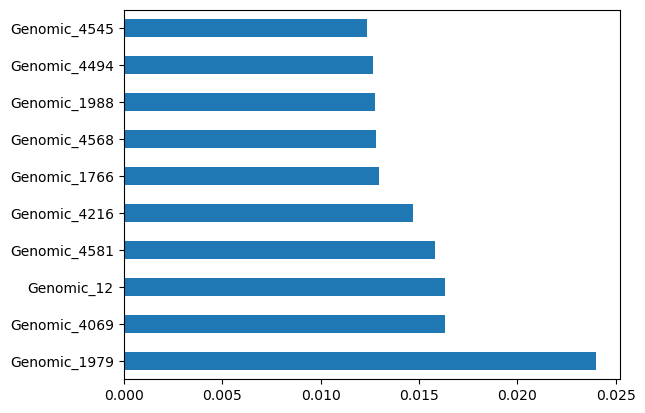

In [7]:
# model interpretation

# feature importance
rf = RandomForestRegressor(random_state=42, n_estimators=10, max_depth=None, max_features='sqrt', min_samples_split=10, min_samples_leaf=4)
rf.fit(X_train, y_train)
rf.feature_importances_

# plot feature importance
importances = pd.Series(rf.feature_importances_, index=selected_columns)
importances.nlargest(10).plot(kind='barh')
plt.show()

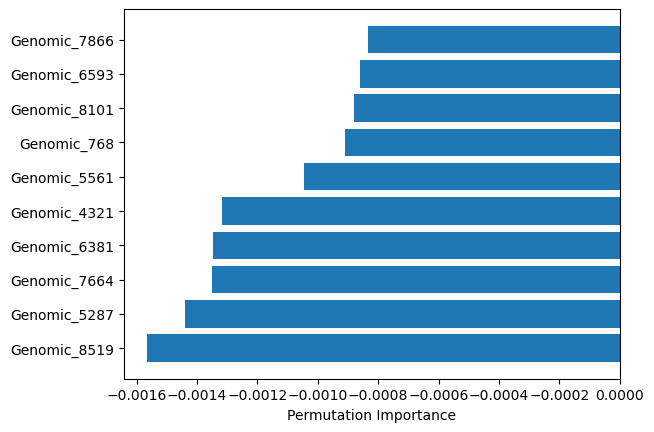

In [8]:
# feature importance based on permutation importance
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(selected_columns[sorted_idx[:10]], perm_importance.importances_mean[sorted_idx[:10]])
plt.xlabel("Permutation Importance")
plt.show()

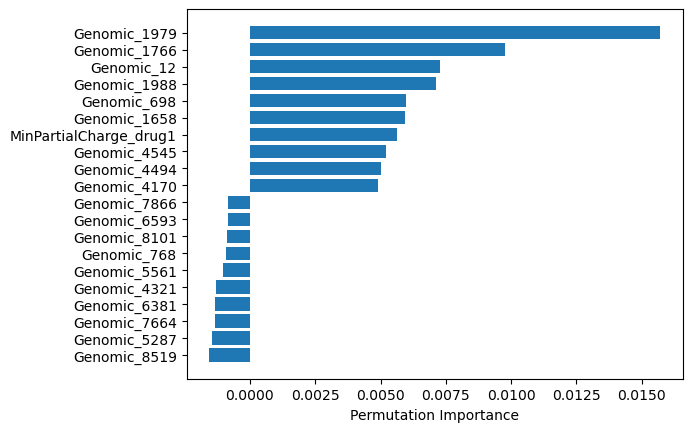

In [9]:
pos_neg_idx = np.concatenate((sorted_idx[:10], sorted_idx[-10:]))
plt.barh(selected_columns[pos_neg_idx], perm_importance.importances_mean[pos_neg_idx])
plt.xlabel("Permutation Importance")
plt.show()